In [18]:
import sys
sys.path.append('../')
from functions import *
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### データ読込

In [19]:
task, target = 'skip', 'ImpressionsSum'
in_dir = f'../data/two_years_each/val/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

### 目的変数の分布

[]

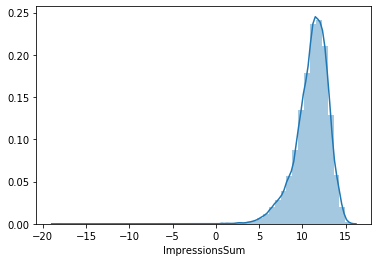

In [20]:
sns.distplot(np.log(df_train_Y[target] + 0.00000001))
plt.plot()

### データ構造転換

In [21]:
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

### パラメータのベイズ最適化

In [22]:
#params = optimize()
#params

### xgboost のバリデーションモデルを作成
- 最適化されたパラメータでモデルを作成

In [23]:
params = {'alpha': 7.141182316783423e-05,
 'colsample_bytree': 0.6000000000000001,
 'eta': 0.05,
 'gamma': 9.915802487125703e-06,
 'lambda': 0.011870790181583973,
 'max_depth': 6,
 'min_child_weight': 7.686339082012547,
 'n_estimators': 810.0,
 'subsample': 0.8500000000000001}

model, evals_result = train2(d_train_sales, d_val_sales, params)
best_iter = model.best_iteration

[0]	train-rmse:10.2419	eval-rmse:10.5212
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[1]	train-rmse:9.73345	eval-rmse:9.99312
[2]	train-rmse:9.25049	eval-rmse:9.49827
[3]	train-rmse:8.79181	eval-rmse:9.02152
[4]	train-rmse:8.35677	eval-rmse:8.57403
[5]	train-rmse:7.94277	eval-rmse:8.14353
[6]	train-rmse:7.54972	eval-rmse:7.73451
[7]	train-rmse:7.17618	eval-rmse:7.34894
[8]	train-rmse:6.82254	eval-rmse:6.98399
[9]	train-rmse:6.48613	eval-rmse:6.6344
[10]	train-rmse:6.16641	eval-rmse:6.30412
[11]	train-rmse:5.86312	eval-rmse:5.98716
[12]	train-rmse:5.57512	eval-rmse:5.68626
[13]	train-rmse:5.30151	eval-rmse:5.40342
[14]	train-rmse:5.04211	eval-rmse:5.13292
[15]	train-rmse:4.79587	eval-rmse:4.87999
[16]	train-rmse:4.56191	eval-rmse:4.6372
[17]	train-rmse:4.33985	eval-rmse:4.40727
[18]	train-rmse:4.12888	eval-rmse:4.18868
[19]	train-rmse:3.92874	eval-rmse:3.98147
[20]	train-rmse:3.73888	eval-

### 損失関数の曲線

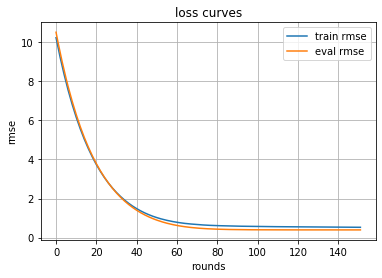

In [24]:
def draw_loss(evals_result):
    train_metric = evals_result['train']['rmse']
    plt.plot(train_metric, label='train rmse')
    eval_metric = evals_result['eval']['rmse']
    plt.plot(eval_metric, label='eval rmse')
    plt.grid()
    plt.legend()
    plt.title('loss curves')
    plt.xlabel('rounds')
    plt.ylabel('rmse')
    plt.show()
draw_loss(evals_result)

### バリデーション結果と実測値

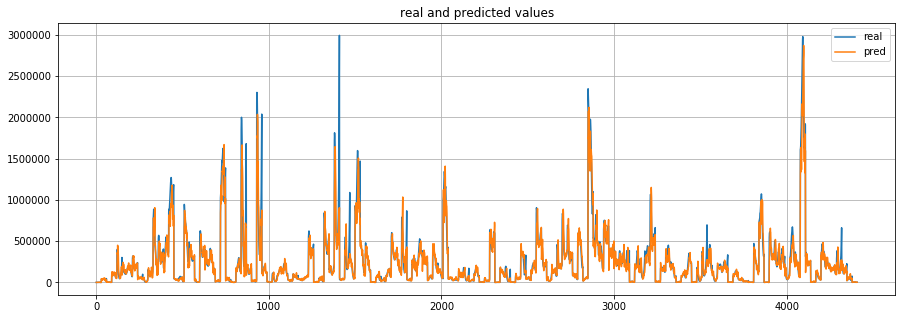

In [25]:
def draw_preds(model, d_val, df_val_Y, target, pred_type='validation'):
    d_pred_log = model.predict(d_val)
    d_pred = np.exp(d_pred_log)
    
    df_val_Y[f'{target}_pred'] = d_pred
    df_val_Y.to_excel(f'./output/{target}_{pred_type}.xlsx')

    plt.figure(figsize=(15,5))
    plt.plot(df_val_Y[target].values, label='real')
    plt.plot(d_pred, label='pred')
    plt.title('real and predicted values')
    plt.legend()
    plt.grid()
    plt.show()
draw_preds(model, d_val, df_val_Y, target)

### 特徴量の寄与度

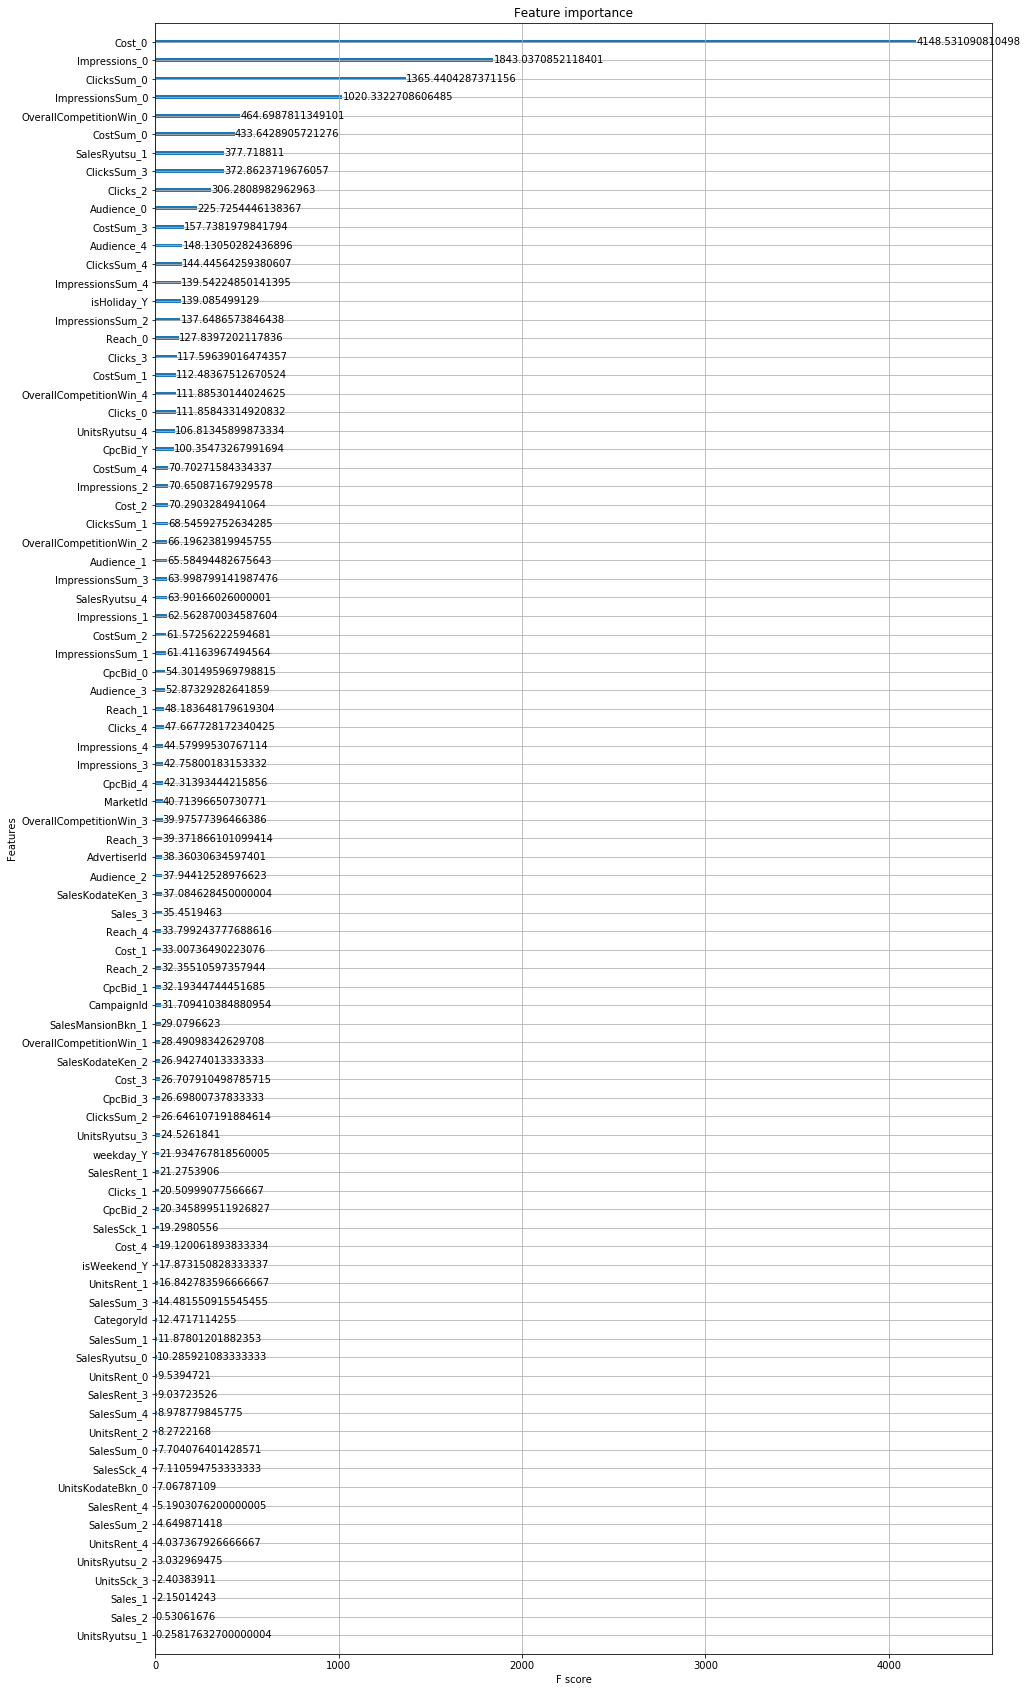

In [26]:
def draw_feat_importances(model):
    _, ax = plt.subplots(figsize=(15,30))
    xgb.plot_importance(model, ax=ax, importance_type='gain')
    plt.show()
draw_feat_importances(model)

In [27]:
fi = get_feat_importances(model)

### 最適化されたパラメータで予測モデルを作成
- テスト１：~2019/12/4を学習して2019/12/5~2019/12/11一週間を予測

In [28]:
# データの読込と前処理
in_dir = f'../data/two_years_each/test_1/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

# xgboost のデータ構造に転換
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

In [29]:
# バリデーションにおいて最適化されたパラメータで学習
model, evals_result = train2(d_train_sales, d_val_sales, params, best_iter=best_iter, esr=None)

[0]	train-rmse:10.2544	eval-rmse:10.7877
[1]	train-rmse:9.74485	eval-rmse:10.257
[2]	train-rmse:9.26139	eval-rmse:9.76442
[3]	train-rmse:8.80218	eval-rmse:9.27961
[4]	train-rmse:8.36542	eval-rmse:8.82573
[5]	train-rmse:7.95072	eval-rmse:8.39376
[6]	train-rmse:7.55684	eval-rmse:7.984
[7]	train-rmse:7.18286	eval-rmse:7.5947
[8]	train-rmse:6.82773	eval-rmse:7.22481
[9]	train-rmse:6.49064	eval-rmse:6.87354
[10]	train-rmse:6.17044	eval-rmse:6.53913
[11]	train-rmse:5.86636	eval-rmse:6.22217
[12]	train-rmse:5.57785	eval-rmse:5.92138
[13]	train-rmse:5.30391	eval-rmse:5.6341
[14]	train-rmse:5.04383	eval-rmse:5.36278
[15]	train-rmse:4.79696	eval-rmse:5.10458
[16]	train-rmse:4.56299	eval-rmse:4.86198
[17]	train-rmse:4.34085	eval-rmse:4.62502
[18]	train-rmse:4.12981	eval-rmse:4.40271
[19]	train-rmse:3.92966	eval-rmse:4.19246
[20]	train-rmse:3.74026	eval-rmse:3.99511
[21]	train-rmse:3.5599	eval-rmse:3.80267
[22]	train-rmse:3.38922	eval-rmse:3.61975
[23]	train-rmse:3.22719	eval-rmse:3.44844
[24]	tra

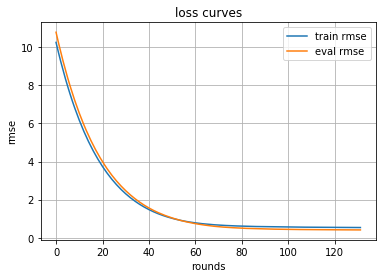

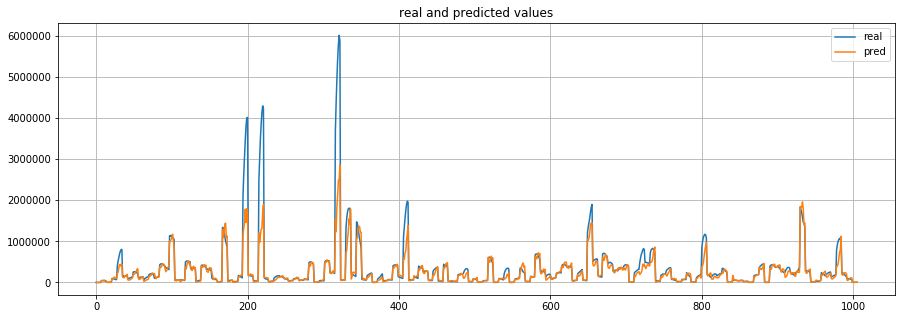

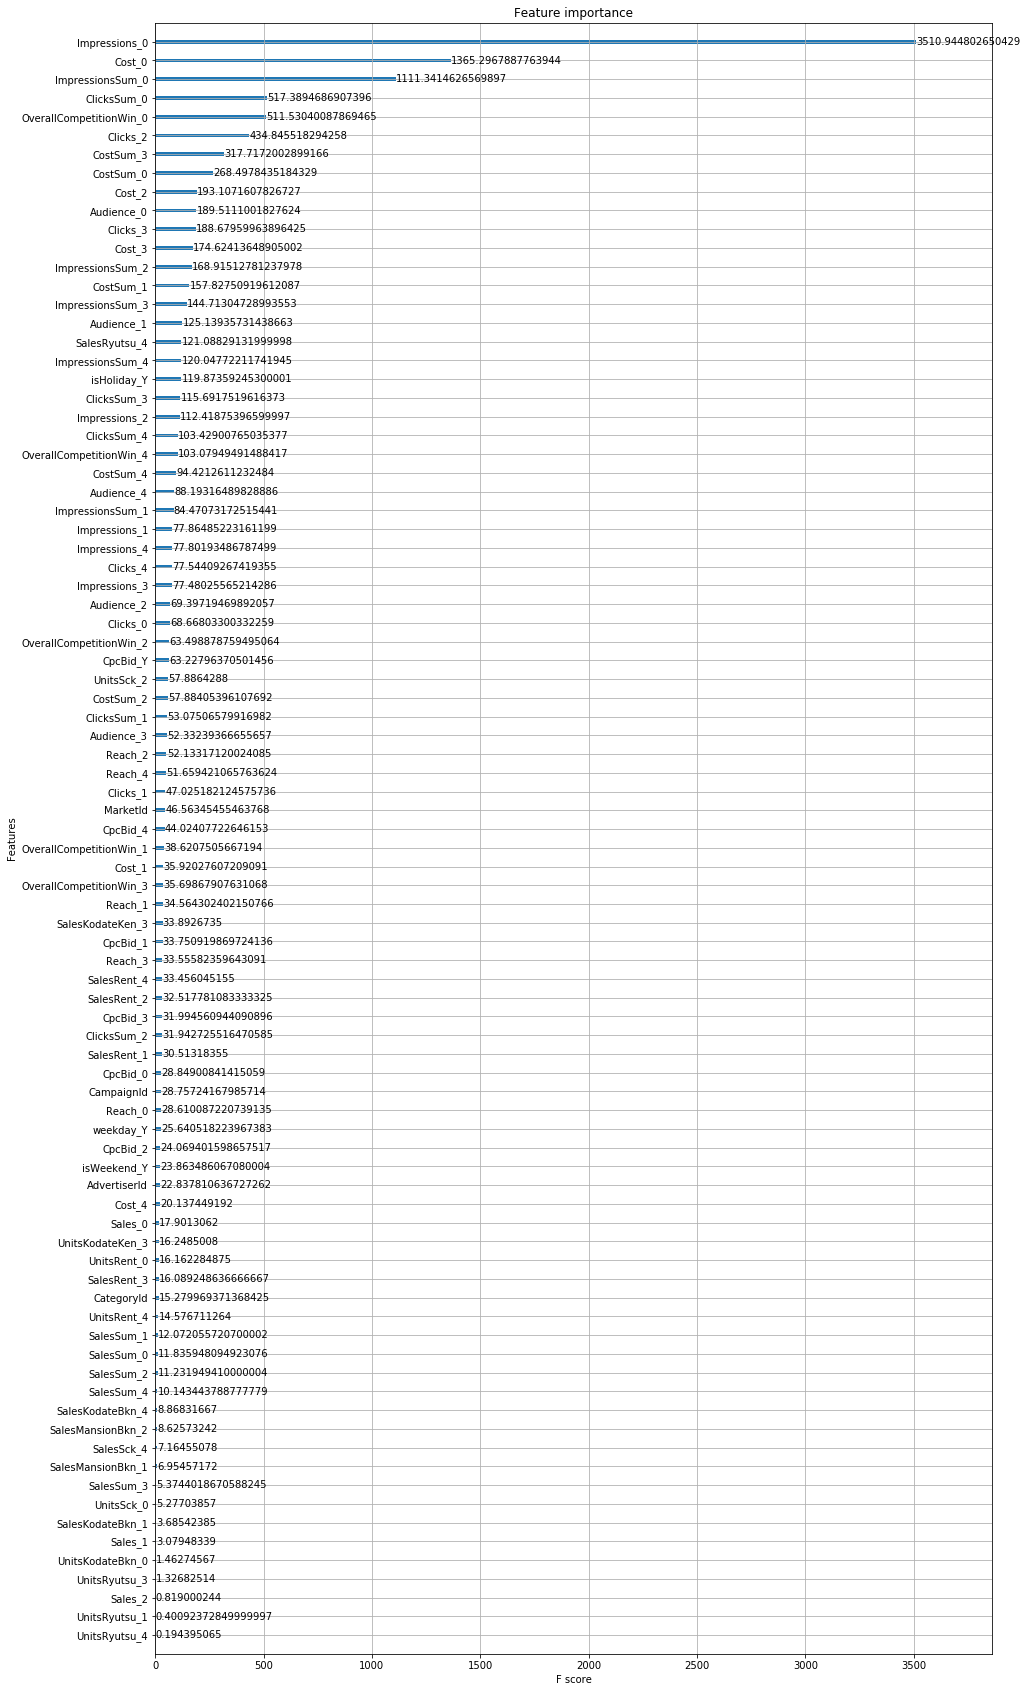

In [30]:
draw_loss(evals_result)
draw_preds(model, d_val, df_val_Y, target, 'test1')
draw_feat_importances(model)

- テスト２：~2019-12-11を学習して2019-12-12~2019-12-18一週間を予測

In [31]:
# データの読込と前処理
in_dir = f'../data/two_years_each/test_2/{task}'
df_train_X, df_train_Y, df_val_X, df_val_Y = read_data(in_dir, target)

# xgboost のデータ構造に転換
d_train_sales, d_val_sales, d_val = mtx_trans(target, df_train_X, df_train_Y, df_val_X, df_val_Y)

In [32]:
# バリデーションにおいて最適化されたパラメータで学習
model, evals_result = train2(d_train_sales, d_val_sales, params, best_iter=best_iter, esr=None)

[0]	train-rmse:10.2599	eval-rmse:10.5273
[1]	train-rmse:9.75001	eval-rmse:9.9916
[2]	train-rmse:9.2658	eval-rmse:9.48144
[3]	train-rmse:8.80607	eval-rmse:8.99355
[4]	train-rmse:8.36925	eval-rmse:8.53361
[5]	train-rmse:7.95442	eval-rmse:8.0974
[6]	train-rmse:7.56073	eval-rmse:7.68039
[7]	train-rmse:7.1868	eval-rmse:7.30922
[8]	train-rmse:6.83197	eval-rmse:6.93322
[9]	train-rmse:6.49454	eval-rmse:6.5769
[10]	train-rmse:6.17445	eval-rmse:6.23684
[11]	train-rmse:5.8701	eval-rmse:5.91612
[12]	train-rmse:5.58141	eval-rmse:5.63666
[13]	train-rmse:5.30758	eval-rmse:5.34595
[14]	train-rmse:5.04736	eval-rmse:5.07084
[15]	train-rmse:4.80065	eval-rmse:4.80796
[16]	train-rmse:4.56616	eval-rmse:4.56112
[17]	train-rmse:4.34376	eval-rmse:4.32588
[18]	train-rmse:4.13263	eval-rmse:4.10332
[19]	train-rmse:3.93235	eval-rmse:3.89153
[20]	train-rmse:3.74262	eval-rmse:3.68819
[21]	train-rmse:3.56242	eval-rmse:3.49692
[22]	train-rmse:3.39142	eval-rmse:3.33616
[23]	train-rmse:3.22894	eval-rmse:3.16377
[24]	tra

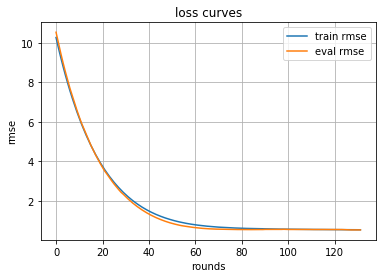

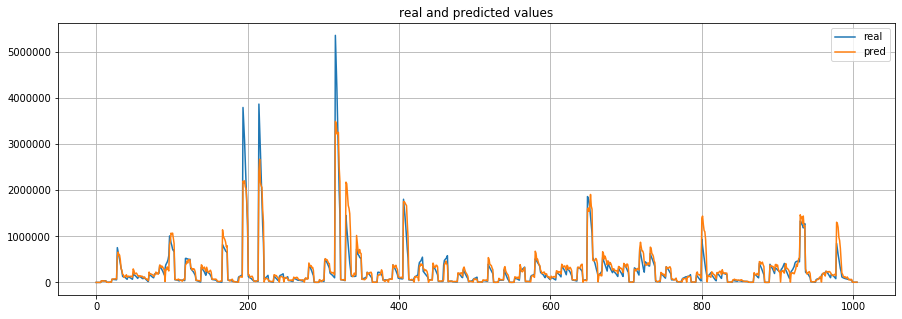

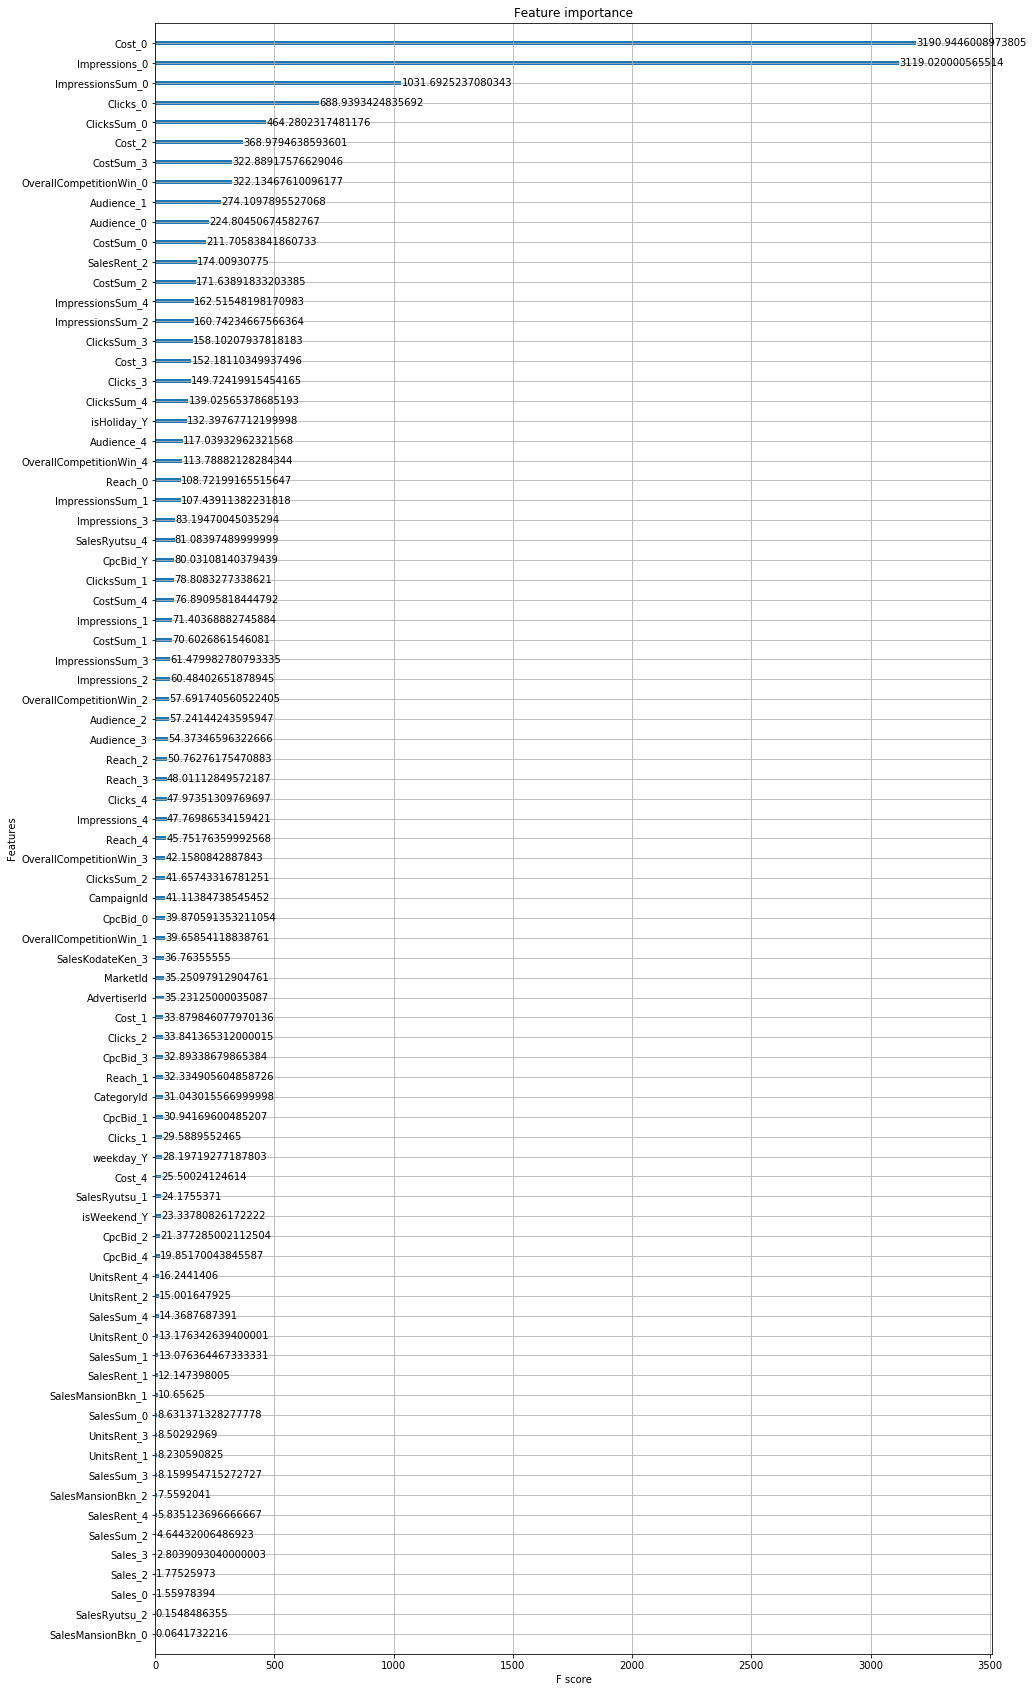

In [33]:
draw_loss(evals_result)
draw_preds(model, d_val, df_val_Y, target, 'test2')
draw_feat_importances(model)